<a href="https://colab.research.google.com/github/jbouhadana13/Data-Mining-Projects/blob/main/ACT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overview: The data set used in this activity is “HeartDisease.txt”. The data set used in this study is from
South African Heart Disease Data (http://www-stat.stanford.edu/~tibs/ElemStatLearn/data.html),
a subset `of the Coronary Risk-Factor Study (CORIS) of the Western Cape, South African. The
aim of this study was to establish the intensity of ischemic heart disease risk factors in the high-
incidence region. (Note: the target variable for this study is “chd”.

Problem 1 Programming and Reporting (15 Points)

PART I Programming (5 Points)

1. Read the data into your software system

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Convert SAS to CSV file
df = pd.read_sas('heartdisease.sas7bdat')

# Save the DataFrame as a CSV file
df.to_csv('heartdiseasee.csv', index=False)

# read and load the csv data file
filename = "heartdiseasee.csv"
data = read_csv ( filename )

data

2. Examine univariate statistics for the following variables:sbp, tobacco, ldl, adiposity, typea,obesity, alcohol, and age.  (not including the target variable)

3. Produce histogram of each of the following variables with imposing normal curve:sbp,tobacco, ldl, adiposity, typea, obesity, alcohol, and age.

4. Produce quantile plot of each of the following variables:sbp, tobacco, ldl, adiposity, typea,obesity, alcohol, and age

In [ ]:
# 2 Examine univariate statistics (do we want to add the median and the mode?)

# Specify the variables you want to examine
variables = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Calculate basic univariate statistics for the selected variables
stats = data[variables].describe()

print(stats)



In [ ]:
# 3 Produce histogram of each of the following variables with imposing normal curve

import scipy.stats as stats

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Loop through the variables and create histograms with a normal curve
for variable in variables:
    plt.figure()
    sns.histplot(data=data, x=variable, kde=True, stat='density', linewidth=0)

    # Calculate the normal curve
    mu, std = data[variable].mean(), data[variable].std()
    x_values = np.linspace(data[variable].min(), data[variable].max(), 100)
    y_values = stats.norm.pdf(x_values, mu, std)


    plt.plot(x_values, y_values, color='r', linestyle='--')
    plt.title(f'Histogram of {variable} with Normal Curve')
    plt.xlabel(variable)
    plt.ylabel('Density')

plt.show()

In [ ]:
# 4 Produce quantile plot of all the variables

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Loop through the variables and create Q-Q plots
for variable in variables:
    plt.figure()
    stats.probplot(data[variable], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {variable}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(f'{variable} Quantiles')

plt.show()

5. Build a logistic regression model with all predictors.

6. Perform power transformation on the following variables:sbp (power = -2), tobacco(power = 0.4), ldl (power = 0.1), obesity (power = -0.4), and alcohol (power = 0.4).



In [ ]:
# 5 build a logic regression model with all of the predictors.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Preprocess the famhist column
encoder = LabelEncoder()
data['famhist'] = encoder.fit_transform(data['famhist'].astype(str))

# Replace 'chd' with the name of your target variable column
target_var = 'chd'

# Separate the predictors (features) and the target variable
X = data.drop(['names', target_var], axis=1)
y = data[target_var]

# Spliting the dataset (WHAT DO WE USE FOR RANDOM STATE? 42? 7? 5?)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creating the logistic regression model (WE NEED TO FIGURE OUT HOW MAN ITERATIONS WE NEED. Sorry for all the caps)
log_reg = LogisticRegression(max_iter=500)

# Fiting the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Stats
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

In [ ]:
# 6 power transformations
df_transformed = pd.DataFrame({
    'sbp': np.power(df['sbp'], -2),
    'tobacco': np.power(df['tobacco'], 0.4),
    'ldl': np.power(df['ldl'], 0.1),
    'obesity': np.power(df['obesity'], -0.4),
    'alcohol': np.power(df['alcohol'], 0.4)
})

print(df_transformed)

7. Produce histogram of each of the following transformed variables with imposing normalcurve:sbp, tobacco, ldl, obesity, and alcohol.

8. Produce quantile plot of each of the following transformed variables:sbp, tobacco, ldl,obesity, and alcohol.

In [ ]:
# 7 making the histogram and quantile plots to match

import scipy.stats as stats

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Loop through the variables and create histograms with a normal curve
for variable in df_transformed.columns:
    plt.figure()
    sns.histplot(data=df_transformed, x=variable, kde=True, stat='density', linewidth=0)

    # Calculate the normal curve
    mu, std = df_transformed[variable].mean(), df_transformed[variable].std()
    x_values = np.linspace(df_transformed[variable].min(), df_transformed[variable].max(), 100)
    y_values = stats.norm.pdf(x_values, mu, std)


    plt.plot(x_values, y_values, color='r', linestyle='--')
    plt.title(f'Transformed Variable: {variable.capitalize()}')
    plt.xlabel(variable)
    plt.ylabel('Density')

plt.show()

In [ ]:
# 8 Produce quantile plot of all the variables

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Loop through the variables and create Q-Q plots
for variable in df_transformed.columns:
    plt.figure()
    stats.probplot(data[variable], dist='norm', plot=plt)
    plt.title(f'Transformed Q-Q Plot of {variable}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel(f'{variable} Quantiles')

plt.show()

9.Build a logistic regression model with all predictors (transformed and three remaining original variables do not perform any transformation).

10.Build another logistic regression model with all predictors as in Part 9 except usingsignificant predictors only

In [ ]:
#9 Build a Log Reg model with both original and transformed variables

# Combining the transformed and original variables
data_combined = pd.concat([df_transformed, data[['adiposity', 'famhist', 'typea', 'age', 'chd']]], axis=1)

# Preprocess the famhist column
encoder = LabelEncoder()
data_combined['famhist'] = encoder.fit_transform(data_combined['famhist'].astype(str))

#renaming target variable
target_var = 'chd'

# Separate the predictors (features) and the target variable
X = data_combined.drop(['chd'], axis=1)
y = data_combined[target_var]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creating the logistic regression model
log_reg = LogisticRegression(max_iter=500)

# Fit the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Stats
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

In [ ]:
#10 build another model, but using the best predictors

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

# Use RFE to select the most significant predictors
rfe = RFE(log_reg, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# Get the list of significant predictors
significant_predictors = X_train.columns[rfe.support_]

# Fit a logistic regression model to the training data
log_reg.fit(X_train[significant_predictors], y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test[significant_predictors])

# Evaluate the performance of the model using confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

PART II Reporting (10 Points)

1. After completion of this activity, complete the following table. (3 Points)

***(I think we only have to complete the table, and not write the code for it.) ***


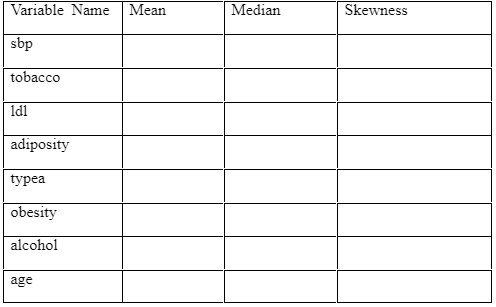




2. Display the histogram and quantile plot of “tobacco”.
3. Display the histogram and quantile plot of “alcohol”

In [ ]:
#Part 2.1
means = data.mean()
medians = data.median()
skewness = data.skew()

results = pd.DataFrame({'Mean': means, 'Median': medians, 'Skewness': skewness})
print(results)


In [ ]:
#Part 2.2

#histogram of "tobacco"
sns.histplot(data=data, x='tobacco')
plt.title('Histogram of Tobacco')
plt.show()

#quantile plot of "tobacco"
stats.probplot(data['tobacco'], dist='norm', plot=plt)
plt.title('Quantile Plot of Tobacco')
plt.show()

In [ ]:
#Part 2.3

#histogram of "alcohol"
sns.histplot(data=data, x='alcohol')
plt.title('Histogram of alcohol')
plt.show()

#quantile plot of "alcohol"
stats.probplot(data['alcohol'], dist='norm', plot=plt)
plt.title('Quantile Plot of alcohol')
plt.show()

In [ ]:
#finding the mean, median (trash stat btw), and Skewness. Then find the histogram and the respective quantile plot

4. Complete the following table. (3 Points)

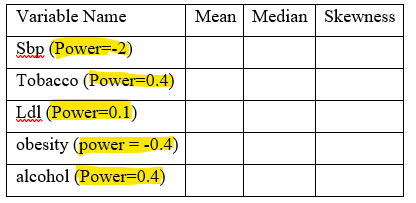


5.	Display the histogram and quantile plot of “tobacco” after power transformation.

6.	Display the histogram and quantile plot of “alcohol” after power transformation.

7.	Find the 95% confidence interval on the likelihood of heart disease if one more kilogram of tobacco consumed using the first model.

8.	Find the 95% confidence interval on the likelihood of heart disease if one more kilogram of alcohol consumed using the first model.

9.	Which model perform better based on the c-statistics?


In [ ]:
#Part 2.4
from scipy.stats import skew

#mean for each variable
sbp_mean = np.mean(data['sbp'] ** -2)
tobacco_mean = np.mean(data['tobacco'] ** 0.4)
ldl_mean = np.mean(data['ldl'] ** 0.1)
obesity_mean = np.mean(data['obesity'] ** -0.4)
alcohol_mean = np.mean(data['alcohol'] ** 0.4)

#median for each variable
sbp_median = np.median(data['sbp'] ** -2)
tobacco_median = np.median(data['tobacco'] ** 0.4)
ldl_median = np.median(data['ldl'] ** 0.1)
obesity_median = np.median(data['obesity'] ** -0.4)
alcohol_median = np.median(data['alcohol'] ** 0.4)

#Calculate skewness for each variable
sbp_skewness = skew(data['sbp'])
tobacco_skewness = skew(data['tobacco'])
ldl_skewness = skew(data['ldl'])
obesity_skewness = skew(data['obesity'])
alcohol_skewness = skew(data['alcohol'])


results = pd.DataFrame({
    'Variable Name': ['Sbp (Power=-2)', 'Tobacco (Power=0.4)', 'Ldl (Power=0.1)', 'obesity (power = -0.4)', 'alcohol (Power=0.4)'],
    'Mean': [sbp_mean, tobacco_mean, ldl_mean, obesity_mean, alcohol_mean],
    'Median': [sbp_median, tobacco_median, ldl_median, obesity_median, alcohol_median],
    'Skewness': [sbp_skewness, tobacco_skewness, ldl_skewness, obesity_skewness, alcohol_skewness]
})

print(results)


In [ ]:
#Part 2.5 and 2.6
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Power transform tobacco and alcohol variables
df_transformed = pd.DataFrame({
    'tobacco': np.power(df['tobacco'], 0.4),
    'alcohol': np.power(df['alcohol'], 0.4)
})

#Plot histogram and quantile plot for tobacco
sns.histplot(df_transformed['tobacco'], kde=True)
plt.title('Histogram of Transformed Tobacco')
plt.show()

sm.qqplot(df_transformed['tobacco'], line='s')
plt.title('Quantile Plot of Transformed Tobacco')
plt.show()

#Plot histogram and quantile plot for alcohol
sns.histplot(df_transformed['alcohol'], kde=True)
plt.title('Histogram of Transformed Alcohol')
plt.show()

sm.qqplot(df_transformed['alcohol'], line='s')
plt.title('Quantile Plot of Transformed Alcohol')
plt.show()



In [ ]:
#Part 2.7 Using "first model" from Brandons 1.5

#coefficient and intercept for tobacco
tobacco_coef = log_reg.coef_[0][X.columns.get_loc('tobacco')]
intercept = log_reg.intercept_[0]

#log odds for kilogram of tobacco
log_odds = intercept + tobacco_coef
odds = np.exp(log_odds)

#probability for tobaccoa consumption x =1
x = 1
prob = odds / (1 + odds)

#SE
n = len(X_test)
se = np.sqrt(prob * (1 - prob) / n)

#z score and bounds
z = 1.96
lower = prob - z * se
upper = prob + z * se

print(f'The 95% confidence interval for the likelihood of heart disease if one more kilogram of tobacco consumed is ({lower:.4f}, {upper:.4f})')

In [ ]:
#Part 2.8 Using "first model" from Brandons 1.5

#coefficient and intercept for alcohol
alcohol_coef = log_reg.coef_[0][X.columns.get_loc('alcohol')]
intercept = log_reg.intercept_[0]

#log odds for kilogram of alcohol
log_odds = intercept + alcohol_coef
odds = np.exp(log_odds)

#probability for alcohol consumption x =1
x = 1
prob = odds / (1 + odds)

#SE
n = len(X_test)
se = np.sqrt(prob * (1 - prob) / n)

#z score and bounds
z = 1.96
lower = prob - z * se
upper = prob + z * se

print(f'The 95% confidence interval for the likelihood of heart disease if one more kilogram of alcohol consumed is ({lower:.4f}, {upper:.4f})')

In [ ]:
#Part 2.9
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
#C stat from Brandon 5
auc = roc_auc_score(y_test, y_pred)
print('C-Statistic for 1st Model:', auc)

#Brandon code from 9
# Combining the transformed and original variables
data_combined = pd.concat([df_transformed, data[['adiposity', 'famhist', 'typea', 'age', 'chd']]], axis=1)

# Preprocess the famhist column
encoder = LabelEncoder()
data_combined['famhist'] = encoder.fit_transform(data_combined['famhist'].astype(str))

#renaming target variable
target_var = 'chd'

# Separate the predictors (features) and the target variable
X = data_combined.drop(['chd'], axis=1)
y = data_combined[target_var]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Creating the logistic regression model
log_reg = LogisticRegression(max_iter=500)

# Fit the model
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

#C stat Brandon 9
auc2 = roc_auc_score(y_test, y_pred)
print('C-Statistic for Other Model:', auc2)

if auc2 > auc:
    print("Since the 2nd transformed model has a higher C statistic, it performed better.")
else:
    print("Since the 1st model has a higher C statistic, it performed better.")




In [ ]:
#completing the table, displaying the histograms, finding the 95% Confidence interval and which model is best.

Problem #2 (5 Points)

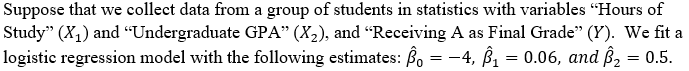

	1. Estimate the probability of a student who spent 10 hours per week with 3.5 undergraduate GPA.

	2. How many hours would the student in part (a) need to study to have 80% or higher chance of getting A in this class?


In [ ]:
# estimating the probability students with 10 hours a week and how many hour is would take to have 80% chance or higher.


xt

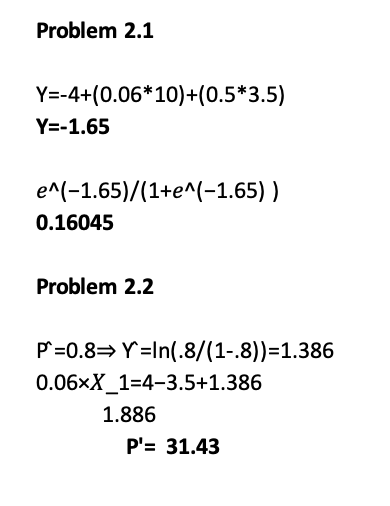